# Moving to Dubai

### import Libararies

In [23]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### Scrap data from Wikipedia

In [24]:
columns=['CommNum','CommName','CommNameArab', 'Area','Population','Density']
dubai_comm=pd.read_html('https://en.wikipedia.org/wiki/List_of_communities_in_Dubai')[0]

dubai_comm.columns=columns
dubai_comm.head()

,CommNum,CommName,CommNameArab,Area,Population,Density
0,126.0,Abu Hail,أبو هيل,1.27 km²,21414,"16,861.4/km²"
1,711.0,Al Awir First,العوير الأولى,NaN,NaN,NaN
2,721.0,Al Awir Second,العوير الثانية,NaN,NaN,NaN
3,333.0,Al Bada,البدع,0.82 km²,18816,22946/km²
4,122.0,Al Baraha,البراحة,1.104 km²,7823,"7,086/km²"


### Drop unneeded columns

In [25]:
dubai_comm.drop('CommNameArab',axis=1,inplace=True)
dubai_comm.drop('CommNum',axis=1,inplace=True)

#dubai_comm.dropna(subset=['Area','Population','Density'],inplace=True)

### Remove Data Noise  , Neighborhood sub naming and missing values

In [26]:
dubai_comm['CommName']=dubai_comm['CommName'].str.replace(' First' ,'',case=False )
dubai_comm['CommName']=dubai_comm['CommName'].str.replace(' Second' ,'',case=False )
dubai_comm['CommName']=dubai_comm['CommName'].str.replace(' Third' ,'',case=False )
dubai_comm['CommName']=dubai_comm['CommName'].str.replace(' Fifth' ,'',case=False )
dubai_comm['CommName']=dubai_comm['CommName'].str.replace(' Fourth' ,'',case=False )
dubai_comm['CommName']=dubai_comm['CommName'].str.replace(' 1' ,'',case=False )
dubai_comm['CommName']=dubai_comm['CommName'].str.replace(' 2' ,'',case=False )


dubai_comm['Area']=dubai_comm['Area'].str.replace(' km²' ,'',case=False )
dubai_comm['Area']=dubai_comm['Area'].str.replace('km²' ,'',case=False )

dubai_comm['Density']=dubai_comm['Density'].str.replace('/km²' ,'',case=False )
dubai_comm['Area']=dubai_comm['Area'].str.replace(',' ,'',case=False )

dubai_comm['Density']=dubai_comm['Density'].str.replace(',' ,'',case=False )

dubai_comm['Area']=dubai_comm['Area'].str.replace(' km2' ,'',case=False )

dubai_comm['Density']=dubai_comm['Density'].str.replace('/km2' ,'',case=False )

dubai_comm['Population']=dubai_comm['Population'].str.replace('[2]' ,'',case=False )
dubai_comm['Population']=dubai_comm['Population'].str.replace("\[]" ,'',case=False )

dubai_comm['Population']=dubai_comm['Population'].str.replace(',' ,'',case=False )

dubai_comm.dropna(subset=['Population','Density','Area'],inplace=True)

dubai_comm



,CommName,Area,Population,Density
0,Abu Hail,1.27,1414,16861.4
3,Al Bada,0.82,18816,22946
4,Al Baraha,1.104,783,7086
11,Al Buteen,0.07,364,33771
12,Al Dhagaya,0.125,10896,21451
13,Al Garhoud,4,4466,1116.5
15,"Al Hamriya, Dubai",0.72,15104,20890
16,Al Hamriya Port,0.89,83,93.25
17,Al Hudaiba,0.84,7699,9165
18,Al Jaddaf,7.3,990,409.5


### remove duplicates

In [27]:
Dubai_df=dubai_comm.drop_duplicates().reset_index(drop=True)

In [28]:

Dubai_df.shape

(65, 4)

### Get Longitude and Latitude for each Neighborhood

In [29]:
coulmns=['CommName','long','lat']
Comm=pd.DataFrame(columns=coulmns)

In [30]:
for community in Dubai_df['CommName']:
    address = community+', Dubai, AE'

    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    try:
        latitude = location.latitude
        longitude=Nonelongitude = location.longitude
    except:
           latitude=None
           longitude=None 
    Comm=Comm.append({'CommName':community,
                       'long':longitude,
                       'lat':latitude
                    },ignore_index=True)
   # print('The geograpical coordinate of {} are {}, {}.'.format(community,latitude, longitude))

In [31]:
Dubai_df.head()

,CommName,Area,Population,Density
0,Abu Hail,1.27,1414,16861.4
1,Al Bada,0.82,18816,22946
2,Al Baraha,1.104,783,7086
3,Al Buteen,0.07,364,33771
4,Al Dhagaya,0.125,10896,21451


### Merge DataFrames and change variables to float

In [47]:
Dubai_Data=pd.merge(Dubai_df,Comm, on='CommName' ).drop_duplicates().reset_index(drop=True)

Dubai_Data.dropna(subset=['long','lat','Area'],inplace=True)

Dubai_Data.reset_index()


Dubai_Data['Area']=Dubai_Data['Area'].astype(float)
Dubai_Data['Density']=Dubai_Data['Density'].astype(float)
Dubai_Data['Population']=Dubai_Data['Population'].astype(float)

### remove all unneeded rows

In [48]:
Dubai_Data=Dubai_Data.drop(Dubai_Data.index[38])
Dubai_Data=Dubai_Data.drop(Dubai_Data.index[33])
Dubai_Data=Dubai_Data.drop(Dubai_Data.index[29])


In [51]:
Dubai_Data=Dubai_Data.reset_index(drop=True)

In [60]:
print('Maximum Neighborhood Density:{}\n Minimum Neighborhood Density:{} \n Avg Density:{}'.format(Dubai_Data['Density'].max(),Dubai_Data['Density'].min(),Dubai_Data['Density'].mean()))

Maximum Neighborhood Density:76923.0
 Minimum Neighborhood Density:44.0 
 Avg Density:10790.958372093026


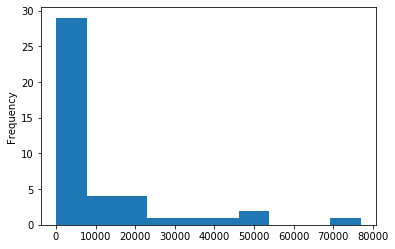

In [85]:
Dubai_Data['Density'].plot(kind='hist')

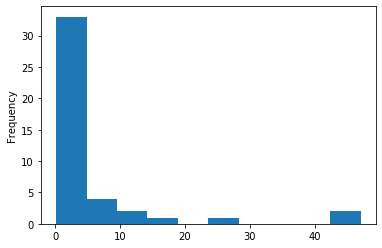

In [86]:
Dubai_Data['Area'].plot(kind='hist')

### Plot on Dubai Map

In [61]:
address = ' Dubai, AE'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
try:
    latitude = location.latitude
    longitude=Nonelongitude = location.longitude
except:
       latitude=None
       longitude=None 
print('The geograpical coordinate of {} are {}, {}.'.format(address,latitude, longitude))

map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)



# add markers to map
for lat, lng, CommName,pop in zip(Dubai_Data['lat'], Dubai_Data['long'], Dubai_Data['CommName'],Dubai_Data['Population']):
    label = 'Name:{} , Population:{} '.format(CommName,pop)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

The geograpical coordinate of  Dubai, AE are 25.0657, 55.1713.


### Extract Nearby Veneues for each Neighborhood using Foursquare API

In [62]:
CLIENT_ID = 'UAVPFGRGEPTHOEAM0NEASUG1DPEPXXZJM4YZYIXXCGCRM3RR' # your Foursquare ID
CLIENT_SECRET = 'LMFUKANAKDANS4BP2E1BQJGDK1RIJW33RYFZ4R3XHJD1HDVY' # your Foursquare Secret
VERSION = '20200401'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: UAVPFGRGEPTHOEAM0NEASUG1DPEPXXZJM4YZYIXXCGCRM3RR
CLIENT_SECRET:LMFUKANAKDANS4BP2E1BQJGDK1RIJW33RYFZ4R3XHJD1HDVY


In [63]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [64]:
dubai_venues = getNearbyVenues(names=Dubai_Data['CommName']+', Dubai, AE',
                                   latitudes=Dubai_Data['lat'],
                                   longitudes=Dubai_Data['long']
                                  )

In [65]:

dubai_venues['Neighborhood']=dubai_venues['Neighborhood'].str.replace(', Dubai, AE' ,'',case=False )

dubai_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Abu Hail,25.285942,55.329444,Hamriya Park,25.285710,55.333000,Park
1,Abu Hail,25.285942,55.329444,Pond Park - Al Qusais,25.288060,55.332606,Park
2,Abu Hail,25.285942,55.329444,Zahr El Laymoun,25.289486,55.330753,Middle Eastern Restaurant
3,Abu Hail,25.285942,55.329444,Lively,25.285194,55.325276,Track
4,Al Baraha,25.282576,55.320139,Ewa Hotel,25.282863,55.316261,Hotel


In [89]:
pd.DataFrame(dubai_venues['Venue Category'].value_counts().head(10))

,Venue Category
Hotel,57
Middle Eastern Restaurant,45
Café,41
Asian Restaurant,34
Coffee Shop,30
Indian Restaurant,29
Restaurant,19
Fast Food Restaurant,15
Ice Cream Shop,10
Gym,10


### Cleaning any Duplicates for the Clustering 

In [66]:
Dubai_Ven_df=dubai_venues.drop_duplicates(subset=['Neighborhood','Venue','Venue Category']).reset_index(drop=True)

In [67]:
Dubai_Ven_df

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Abu Hail,25.285942,55.329444,Hamriya Park,25.285710,55.333000,Park
1,Abu Hail,25.285942,55.329444,Pond Park - Al Qusais,25.288060,55.332606,Park
2,Abu Hail,25.285942,55.329444,Zahr El Laymoun,25.289486,55.330753,Middle Eastern Restaurant
3,Abu Hail,25.285942,55.329444,Lively,25.285194,55.325276,Track
4,Al Baraha,25.282576,55.320139,Ewa Hotel,25.282863,55.316261,Hotel
5,Al Baraha,25.282576,55.320139,Filli Cafe,25.282695,55.316037,Café
6,Al Baraha,25.282576,55.320139,Gloria Jean's Coffee,25.285392,55.321544,Coffee Shop
7,Al Baraha,25.282576,55.320139,Dubai Hospital Pharmacy,25.284530,55.320999,Pharmacy
8,Al Baraha,25.282576,55.320139,The Spice Of life 13th Floor DH,25.284763,55.322026,Middle Eastern Restaurant
9,Al Garhoud,25.239831,55.355668,Premier Inn Dubai International Airport,25.243025,55.358936,Hotel


### Preparing data for Clustering 

In [68]:
Dubai_Ven_cat = pd.get_dummies(Dubai_Ven_df[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Dubai_Ven_cat['Neighborhood'] = Dubai_Ven_df['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Dubai_Ven_cat.columns[-1]] + list(Dubai_Ven_cat.columns[:-1])
Dubai_Ven_cat = Dubai_Ven_cat[fixed_columns]

Dubai_Ven_cat.head()

,Neighborhood,Afghan Restaurant,African Restaurant,Airport Food Court,Airport Terminal,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Baby Store,Badminton Court,Bakery,Bar,Beach,Bistro,Breakfast Spot,Burger Joint,Bus Station,Business Service,Cafeteria,Café,Campground,Carpet Store,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Convenience Store,Convention Center,Cosmetics Shop,Currency Exchange,Dance Studio,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Electronics Store,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Floating Market,Flower Shop,Food,Food & Drink Shop,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hookah Bar,Hotel,Hotel Bar,Hotel Pool,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Iraqi Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Lounge,Market,Medical Supply Store,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Mobility Store,Monument / Landmark,Moroccan Restaurant,Movie Theater,Music Store,Nail Salon,New American Restaurant,Nightclub,North Indian Restaurant,Office,Opera House,Pakistani Restaurant,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Post Office,Restaurant,Roof Deck,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shawarma Place,Shipping Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soccer Field,South Indian Restaurant,Spa,Spanish Restaurant,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Tailor Shop,Tapas Restaurant,Tea Room,Thai Restaurant,Theme Restaurant,Track,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Women's Store,Yemeni Restaurant
0,Abu Hail,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Abu Hail,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Abu Hail,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Abu Hail,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,Al Baraha,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [69]:
Dubai_grouped = Dubai_Ven_cat.groupby('Neighborhood').mean().reset_index()
Dubai_grouped

,Neighborhood,Afghan Restaurant,African Restaurant,Airport Food Court,Airport Terminal,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Baby Store,Badminton Court,Bakery,Bar,Beach,Bistro,Breakfast Spot,Burger Joint,Bus Station,Business Service,Cafeteria,Café,Campground,Carpet Store,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Convenience Store,Convention Center,Cosmetics Shop,Currency Exchange,Dance Studio,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Electronics Store,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Floating Market,Flower Shop,Food,Food & Drink Shop,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hookah Bar,Hotel,Hotel Bar,Hotel Pool,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Iraqi Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Lounge,Market,Medical Supply Store,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Mobility Store,Monument / Landmark,Moroccan Restaurant,Movie Theater,Music Store,Nail Salon,New American Restaurant,Nightclub,North Indian Restaurant,Office,Opera House,Pakistani Restaurant,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Post Office,Restaurant,Roof Deck,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shawarma Place,Shipping Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soccer Field,South Indian Restaurant,Spa,Spanish Restaurant,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Tailor Shop,Tapas Restaurant,Tea Room,Thai Restaurant,Theme Restaurant,Track,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Women's Store,Yemeni Restaurant
0,Abu Hail,0.000000,0.00,0.00,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Al Baraha,0.000000,0.00,0.00,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,

In [70]:
num_top_venues = 5

for hood in Dubai_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Dubai_grouped[Dubai_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Abu Hail----
                       venue  freq
0                       Park  0.50
1  Middle Eastern Restaurant  0.25
2                      Track  0.25
3    New American Restaurant  0.00
4             Mobility Store  0.00


----Al Baraha----
                       venue  freq
0                   Pharmacy   0.2
1                       Café   0.2
2  Middle Eastern Restaurant   0.2
3                Coffee Shop   0.2
4                      Hotel   0.2


----Al Garhoud----
            venue  freq
0           Hotel  0.27
1     Post Office  0.18
2            Café  0.09
3  Shipping Store  0.09
4     Coffee Shop  0.09


----Al Hudaiba----
                       venue  freq
0                       Café  0.13
1  Middle Eastern Restaurant  0.10
2           Asian Restaurant  0.10
3          Convenience Store  0.10
4                 Smoke Shop  0.07


----Al Jaddaf----
                     venue  freq
0         Business Service  0.33
1     Medical Supply Store  0.17
2             Carpet Store  

In [71]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [72]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Dubai_grouped['Neighborhood']

for ind in np.arange(Dubai_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Dubai_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abu Hail,Park,Track,Middle Eastern Restaurant,Yemeni Restaurant,Filipino Restaurant,Food & Drink Shop,Food,Flower Shop,Floating Market,Flea Market
1,Al Baraha,Middle Eastern Restaurant,Pharmacy,Café,Hotel,Coffee Shop,Fish Market,Food & Drink Shop,Food,Flower Shop,Floating Market
2,Al Garhoud,Hotel,Post Office,Pool,Dessert Shop,Shipping Store,Café,Coffee Shop,Restaurant,Fast Food Restaurant,Floating Market
3,Al Hudaiba,Café,Convenience Store,Middle Eastern Restaurant,Asian Restaurant,Hotel,Dessert Shop,Smoke Shop,North Indian Restaurant,Cafeteria,Chinese Restaurant
4,Al Jaddaf,Business Service,Health & Beauty Service,Medical Supply Store,Fast Food Restaurant,Carpet Store,Flea Market,Food & Drink Shop,Food,Flower Shop,Floating Market


## Clustering Using K-Means

In [73]:
kclusters = 5

Dubai_Data.columns=['Neighborhood','Area','Population','Density','long','lat']

Dubai_grouped_clustering = pd.merge(Dubai_grouped,Dubai_Data.dropna(subset=['Area']), on ='Neighborhood').drop(['Neighborhood','long','lat'], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Dubai_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 3, 0, 0, 0], dtype=int32)

In [74]:
neighborhoods_venues_sorted.reset_index()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Abu Hail,Park,Track,Middle Eastern Restaurant,Yemeni Restaurant,Filipino Restaurant,Food & Drink Shop,Food,Flower Shop,Floating Market,Flea Market
1,1,Al Baraha,Middle Eastern Restaurant,Pharmacy,Café,Hotel,Coffee Shop,Fish Market,Food & Drink Shop,Food,Flower Shop,Floating Market
2,2,Al Garhoud,Hotel,Post Office,Pool,Dessert Shop,Shipping Store,Café,Coffee Shop,Restaurant,Fast Food Restaurant,Floating Market
3,3,Al Hudaiba,Café,Convenience Store,Middle Eastern Restaurant,Asian Restaurant,Hotel,Dessert Shop,Smoke Shop,North Indian Restaurant,Cafeteria,Chinese Restaurant
4,4,Al Jaddaf,Business Service,Health & Beauty Service,Medical Supply Store,Fast Food Restaurant,Carpet Store,Flea Market,Food & Drink Shop,Food,Flower Shop,Floating Market
5,5,Al Jafiliya,Coffee Shop,Intersection,Track,Fast Food Restaurant,Sandwich Place,Metro Station,Hotel Bar,Food & Drink Shop,Dim Sum Restaurant,Diner
6,6,Al Karama,Indian Restaurant,Asian Restaurant,Bakery,Ice Cream Shop,Middle Eastern Restaurant,Restaurant,Korean Restaurant,South Indian Restaurant,Supermarket,Café
7,7,Al Kifaf,Electronics Store,Department Store,Grocery Store,Asian Restaurant,Café,Middle Eastern Restaurant,Furniture / Home Store,Tailor Shop,Indian Restaurant,Women's Store
8,8,Al Mamzar,Restaurant,Yemeni Restaurant,Filipino Restaurant,Food & Drink Shop,Food,Flower Shop,Floating Market,Flea Market,Fish Market,Fast Food Restaurant
9,9,Al Manara,Cafeteria,Playground,Coffee Shop,Gym,Yemeni Restaurant,Fish Market,Food,Flower Shop,Floating Market,Flea Market


### Adding Clusers to main Dataset

In [75]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Dubai_merged = Dubai_Data.dropna(subset=['Area'])

Dubai_merged.columns=['Neighborhood','Area','Population','Density','long','lat']

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Dubai_merged = Dubai_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')


Dubai_merged.head() # check the last columns!

,Neighborhood,Area,Population,Density,long,lat,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abu Hail,1.270,1414.0,16861.4,55.329444,25.285942,0,Park,Track,Middle Eastern Restaurant,Yemeni Restaurant,Filipino Restaurant,Food & Drink Shop,Food,Flower Shop,Floating Market,Flea Market
1,Al Baraha,1.104,783.0,7086.0,55.320139,25.282576,0,Middle Eastern Restaurant,Pharmacy,Café,Hotel,Coffee Shop,Fish Market,Food & Drink Shop,Food,Flower Shop,Floating Market
2,Al Garhoud,4.000,4466.0,1116.5,55.355668,25.239831,0,Hotel,Post Office,Pool,Dessert Shop,Shipping Store,Café,Coffee Shop,Restaurant,Fast Food Restaurant,Floating Market
3,Al Hudaiba,0.840,7699.0,9165.0,55.277459,25.240050,0,Café,Convenience Store,Middle Eastern Restaurant,Asian Restaurant,Hotel,Dessert Shop,Smoke Shop,North Indian Restaurant,Cafeteria,Chinese Restaurant
4,Al Jaddaf,7.300,990.0,409.5,55.171300,25.065700,0,Business Service,Health & Beauty Service,Medical Supply Store,Fast Food Restaurant,Carpet Store,Flea Market,Food & Drink Shop,Food,Flower Shop,Floating Market


In [76]:
Dubai_Data.shape

(43, 6)

### Plot Clusters into the Map

In [77]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Dubai_merged['lat'], Dubai_merged['long'], Dubai_merged['Neighborhood'], Dubai_merged['Cluster Labels']):
    
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [78]:
Dubai_merged

,Neighborhood,Area,Population,Density,long,lat,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abu Hail,1.270,1414.0,16861.40,55.329444,25.285942,0,Park,Track,Middle Eastern Restaurant,Yemeni Restaurant,Filipino Restaurant,Food & Drink Shop,Food,Flower Shop,Floating Market,Flea Market
1,Al Baraha,1.104,783.0,7086.00,55.320139,25.282576,0,Middle Eastern Restaurant,Pharmacy,Café,Hotel,Coffee Shop,Fish Market,Food & Drink Shop,Food,Flower Shop,Floating Market
2,Al Garhoud,4.000,4466.0,1116.50,55.355668,25.239831,0,Hotel,Post Office,Pool,Dessert Shop,Shipping Store,Café,Coffee Shop,Restaurant,Fast Food Restaurant,Floating Market
3,Al Hudaiba,0.840,7699.0,9165.00,55.277459,25.240050,0,Café,Convenience Store,Middle Eastern Restaurant,Asian Restaurant,Hotel,Dessert Shop,Smoke Shop,North Indian Restaurant,Cafeteria,Chinese Restaurant
4,Al Jaddaf,7.300,990.0,409.50,55.171300,25.065700,0,Business Service,Health & Beauty Service,Medical Supply Store,Fast Food Restaurant,Carpet Store,Flea Market,Food & Drink Shop,Food,Flower Shop,Floating Market
5,Al Jafiliya,1.630,11619.0,7128.00,55.292050,25.233360,0,Coffee Shop,Intersection,Track,Fast Food Restaurant,Sandwich Place,Metro Station,Hotel Bar,Food & Drink Shop,Dim Sum Restaurant,Diner
6,Al Karama,1.509,45674.0,30267.00,55.304755,25.244403,3,Indian Restaurant,Asian Restaurant,Bakery,Ice Cream Shop,Middle Eastern Restaurant,Restaurant,Korean Restaurant,South Indian Restaurant,Supermarket,Café
7,Al Kifaf,0.800,35.0,44.00,55.274809,25.227887,0,Electronics Store,Department Store,Grocery Store,Asian Restaurant,Café,Middle Eastern Restaurant,Furniture / Home Store,Tailor Shop,Indian Restaurant,Women's Store
8,Al Mamzar,3.350,60.0,674.60,55.343453,25.303247,0,Restaurant,Yemeni Restaurant,Filipino Restaurant,Food & Drink Shop,Food,Flower Shop,Floating Market,Flea Market,Fish Market,Fast Food Restaurant
9,Al Manara,2.100,147.0,1022.00,55.213574,25.143712,0,Cafeteria,Playground,Coffee Shop,Gym,Yemeni Restaurant,Fish Market,Food,Flower Shop,Floating Market,Flea Market


### Cluster 1

In [79]:
Dubai_merged.loc[Dubai_merged['Cluster Labels'] == 0]

,Neighborhood,Area,Population,Density,long,lat,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abu Hail,1.270,1414.0,16861.40,55.329444,25.285942,0,Park,Track,Middle Eastern Restaurant,Yemeni Restaurant,Filipino Restaurant,Food & Drink Shop,Food,Flower Shop,Floating Market,Flea Market
1,Al Baraha,1.104,783.0,7086.00,55.320139,25.282576,0,Middle Eastern Restaurant,Pharmacy,Café,Hotel,Coffee Shop,Fish Market,Food & Drink Shop,Food,Flower Shop,Floating Market
2,Al Garhoud,4.000,4466.0,1116.50,55.355668,25.239831,0,Hotel,Post Office,Pool,Dessert Shop,Shipping Store,Café,Coffee Shop,Restaurant,Fast Food Restaurant,Floating Market
3,Al Hudaiba,0.840,7699.0,9165.00,55.277459,25.240050,0,Café,Convenience Store,Middle Eastern Restaurant,Asian Restaurant,Hotel,Dessert Shop,Smoke Shop,North Indian Restaurant,Cafeteria,Chinese Restaurant
4,Al Jaddaf,7.300,990.0,409.50,55.171300,25.065700,0,Business Service,Health & Beauty Service,Medical Supply Store,Fast Food Restaurant,Carpet Store,Flea Market,Food & Drink Shop,Food,Flower Shop,Floating Market
5,Al Jafiliya,1.630,11619.0,7128.00,55.292050,25.233360,0,Coffee Shop,Intersection,Track,Fast Food Restaurant,Sandwich Place,Metro Station,Hotel Bar,Food & Drink Shop,Dim Sum Restaurant,Diner
7,Al Kifaf,0.800,35.0,44.00,55.274809,25.227887,0,Electronics Store,Department Store,Grocery Store,Asian Restaurant,Café,Middle Eastern Restaurant,Furniture / Home Store,Tailor Shop,Indian Restaurant,Women's Store
8,Al Mamzar,3.350,60.0,674.60,55.343453,25.303247,0,Restaurant,Yemeni Restaurant,Filipino Restaurant,Food & Drink Shop,Food,Flower Shop,Floating Market,Flea Market,Fish Market,Fast Food Restaurant
9,Al Manara,2.100,147.0,1022.00,55.213574,25.143712,0,Cafeteria,Playground,Coffee Shop,Gym,Yemeni Restaurant,Fish Market,Food,Flower Shop,Floating Market,Flea Market
14,Al Nahda,3.180,600.0,188.67,55.309774,25.276542,0,Hotel,Asian Restaurant,Pizza Place,Women's Store,Café,Middle Eastern Restaurant,Indie Movie Theater,Mobile Phone Shop,Smoke Shop,Intersection


### Cluster 2

In [80]:
Dubai_merged.loc[Dubai_merged['Cluster Labels'] == 1]

,Neighborhood,Area,Population,Density,long,lat,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,Business Bay,46.0,191000.0,4200.0,55.265022,25.188828,1,Indian Restaurant,Gym / Fitness Center,Hotel,Lounge,Asian Restaurant,New American Restaurant,Spa,Café,Sandwich Place,Mexican Restaurant


### Cluster 3

In [81]:
Dubai_merged.loc[Dubai_merged['Cluster Labels'] == 2]

,Neighborhood,Area,Population,Density,long,lat,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Al Muraqqabat,0.780,3395.0,41532.0,55.324222,25.266308,2,Middle Eastern Restaurant,Hotel,Fast Food Restaurant,Fried Chicken Joint,Asian Restaurant,Department Store,Restaurant,Chocolate Shop,Coffee Shop,Comedy Club
12,Al Murar,0.410,19831.0,48368.0,55.309763,25.276677,2,Hotel,Asian Restaurant,Pizza Place,Women's Store,Café,Middle Eastern Restaurant,Indie Movie Theater,Mobile Phone Shop,Smoke Shop,Intersection
16,Al Ras,0.200,681.0,34060.0,55.296075,25.268885,2,Market,Middle Eastern Restaurant,Office,Electronics Store,Farmers Market,Fast Food Restaurant,Coffee Shop,Flea Market,Floating Market,Flower Shop
23,Ayal Nasir,0.170,13077.0,76923.0,55.303120,25.275307,2,Hotel,Middle Eastern Restaurant,Café,Mobile Phone Shop,Clothing Store,Restaurant,Karaoke Bar,Flea Market,Pool,Lounge
33,Naif,0.561,8571.0,50928.0,55.311351,25.272775,2,Hotel,Asian Restaurant,Women's Store,Café,Music Store,Fast Food Restaurant,Middle Eastern Restaurant,Indian Restaurant,Farmers Market,Electronics Store


### Cluster 4

In [82]:
Dubai_merged.loc[Dubai_merged['Cluster Labels'] == 3]

,Neighborhood,Area,Population,Density,long,lat,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Al Karama,1.509,45674.0,30267.0,55.304755,25.244403,3,Indian Restaurant,Asian Restaurant,Bakery,Ice Cream Shop,Middle Eastern Restaurant,Restaurant,Korean Restaurant,South Indian Restaurant,Supermarket,Café
10,Al Mankhool,1.000,16013.0,16013.0,55.295620,25.250827,3,Hotel,Sports Bar,Asian Restaurant,Coffee Shop,Indian Restaurant,Campground,Breakfast Spot,Roof Deck,Chinese Restaurant,Greek Restaurant
13,Al Muteena,1.120,18094.0,16155.0,55.322630,25.273892,3,Hotel,Filipino Restaurant,Chinese Restaurant,Café,Iraqi Restaurant,Bar,Hookah Bar,Gym,Furniture / Home Store,Fried Chicken Joint
15,Al Quoz,27.100,16719.0,617.0,55.253398,25.169070,3,Cafeteria,Harbor / Marina,Restaurant,Indian Restaurant,Ice Cream Shop,Mediterranean Restaurant,Historic Site,BBQ Joint,Bakery,Food & Drink Shop
21,Al Satwa,2.870,30147.0,10504.0,55.273836,25.221161,3,Coffee Shop,Airport Food Court,Beach,Asian Restaurant,Flea Market,Fried Chicken Joint,French Restaurant,Food & Drink Shop,Food,Flower Shop
25,Downtown Dubai,2.680,18698.0,6975.0,55.272617,25.192993,3,Hotel,Japanese Restaurant,Lounge,Coffee Shop,Pool,Restaurant,Scenic Lookout,Café,Bakery,Bar
28,Jebel Ali,47.100,31634.0,672.0,55.123823,25.028782,3,Coffee Shop,Yemeni Restaurant,Fish Market,French Restaurant,Food & Drink Shop,Food,Flower Shop,Floating Market,Flea Market,Filipino Restaurant
40,Umm Suqeim,7.200,16459.0,2286.0,55.208771,25.150529,3,Dessert Shop,Café,Dance Studio,Cosmetics Shop,Hotel,Arts & Crafts Store,Playground,Convenience Store,Coffee Shop,Gym


### Cluster 5

In [83]:
Dubai_merged.loc[Dubai_merged['Cluster Labels'] == 4]

,Neighborhood,Area,Population,Density,long,lat,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31,Muhaisanah,13.0,90870.0,6990.0,55.410502,25.280555,4,Currency Exchange,Business Service,Grocery Store,Gym,Fast Food Restaurant,Yemeni Restaurant,Flea Market,Food & Drink Shop,Food,Flower Shop
